## Projection for TVBVP

Projection: Solve the life-cycle consumption example using collocation.
Use 7th degree polynomials.

In [16]:
import numpy as np
import pandas as pd

p = 0.05
r = 0.06
a0 = 1
aT = 0
n = 7


t_vector = np.linspace(0, 100, n)
T_matrix = np.zeros((n, n + 1))
Tderiv_matrix = np.zeros((n, n + 1))
PQ_vector = np.zeros(2*(n + 1))
A_matrix = np.zeros((2*(n+1), 2*(n+1)))
Bound_matrix = np.zeros((2, n+1)) # LHS
B_vector = np.zeros(2*(n + 1)) # RHS
Bound_matrix[0, 0] = 1
Bound_matrix[1, -1] = 1
B_vector[-2] = a0 
B_vector[-1] = aT

T_matrix[:, 0] = 1

for j in range(1, n + 1):
    T_matrix[:, j] = t_vector**j
    Tderiv_matrix[:, j] = j*t_vector**(j - 1)

A_matrix = np.vstack(  (np.vstack((np.hstack( ((Tderiv_matrix - r*T_matrix), T_matrix) ),
                                np.hstack( (np.zeros((n, n + 1)), (Tderiv_matrix - (r-p)*T_matrix)) ) 
                                )),
                        np.hstack( (Bound_matrix, np.zeros((2, n + 1))) ))  )

#pd.DataFrame(A_matrix)

# Ax = B_vector
np.linalg.solve(A_matrix, B_vector)

array([1.00000000e+00, 9.99998726e-03, 5.00008280e-05, 1.66562427e-07,
       4.19972715e-10, 7.70395809e-13, 1.92598952e-15, 1.79856130e-27,
       5.00000127e-02, 5.00000127e-04, 2.49998790e-06, 8.33454132e-09,
       2.07846369e-11, 4.26927677e-14, 5.77796856e-17, 1.65084816e-19])

In [19]:
print(B_vector)
pd.DataFrame(A_matrix)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.06,1.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,-0.06,0.0,16.666667,555.555556,1.388889e+04,3.086420e+05,6.430041e+06,1.286008e+08,1.00,1.666667e+01,277.777778,4629.629630,7.716049e+04,1.286008e+06,2.143347e+07,3.572245e+08
2,-0.06,-1.0,0.000000,1111.111111,7.407407e+04,3.703704e+06,1.646091e+08,6.858711e+09,1.00,3.333333e+01,1111.111111,37037.037037,1.234568e+06,4.115226e+07,1.371742e+09,4.572474e+10
3,-0.06,-2.0,-50.000000,0.000000,1.250000e+05,1.250000e+07,9.375000e+08,6.250000e+10,1.00,5.000000e+01,2500.000000,125000.000000,6.250000e+06,3.125000e+08,1.562500e+10,7.812500e+11
4,-0.06,-3.0,-133.333333,-4444.444444,-2.328306e-10,1.975309e+07,2.633745e+09,2.633745e+11,1.00,6.666667e+01,4444.444444,296296.296296,1.975309e+07,1.316872e+09,8.779150e+10,5.852766e+12
5,-0.06,-4.0,-250.000000,-13888.888889,-5.787037e+05,-2.980232e-08,4.018776e+09,6.697960e+11,1.00,8.333333e+01,6944.444444,578703.703704,4.822531e+07,4.018776e+09,3.348980e+11,2.790816e+13
6,-0.06,-5.0,-400.000000,-30000.000000,-2.000000e+06,-1.000000e+08,0.000000e+00,1.000000e+12,1.00,1.000000e+02,10000.000000,1000000.000000,1.000000e+08,1.000000e+10,1.000000e+12,1.000000e+14
7,0.00,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.01,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,0.00,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.01,8.333333e-01,30.555556,787.037037,1.774691e+04,3.729424e+05,7.501715e+06,1.464620e+08
9,0.00,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.01,6.666667e-01,55.555556,2962.962963,1.358025e+05,5.761317e+06,2.331962e+08,9.144947e+09


## Integration: Derivative price using Gauss-Hermite quadrature

Integration: Assume a simple derivative is of the form $\Phi(S_T) = S^2_T − 30S_T$ , where $S$ follows a geometric Wiener process with
volatility $\sigma$. \
Calculate its price F(t,s) by Gauss-Hermite quadrature on each $s ∈ [40, 60]$. Use the following parameters: \
$r = .01, \sigma = .4, T − t = .5$ \
Plot F against s.


In [26]:
import numpy as np

r = 0.01
sigma = 0.4
tau = 0.5

X = np.polynomial.hermite.hermgauss(10)[0]
W = np.polynomial.hermite.hermgauss(10)[1]

F_t_s = np.zeros((60-40+1))
S = range(40, 60 + 1)

for s in S:
    F_t_s[s - 40] = 1/np.sqrt(np.pi)*np.exp(-r*tau) \
                    *sum([W[i] * \
                          ( ( s*np.exp( (r-sigma**2/2)*tau + sigma*np.sqrt(2*tau)*X[i]) )**2 - 30*s*np.exp((r-sigma**2/2)*tau + sigma*np.sqrt(2*tau)*X[i]) ) \
                            for i in range(len(W))])

F_t_s

array([ 541.94730672,  600.13338912,  660.49690566,  723.03785633,
        787.75624113,  854.65206006,  923.72531313,  994.97600034,
       1068.40412167, 1144.00967714, 1221.79266675, 1301.75309048,
       1383.89094835, 1468.20624036, 1554.69896649, 1643.36912676,
       1734.21672117, 1827.2417497 , 1922.44421237, 2019.82410918,
       2119.38144011])

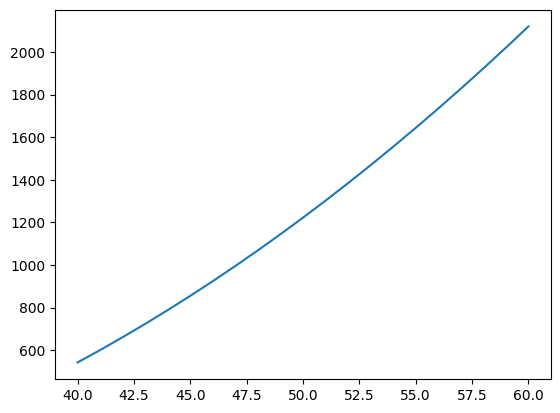

In [27]:
import matplotlib.pyplot as plt

plt.plot(S, F_t_s)

plt.show()